# 0.0 Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn.linear_model import Lasso

In [2]:
warnings.filterwarnings("ignore")

# 1.0 Load Datasets

In [3]:
#Data Path
data_path_X_trian = '../regressao/X_training.csv'
data_path_y_trian = '../regressao/y_training.csv'

data_path_X_val = '../regressao/X_validation.csv'
data_path_y_val = '../regressao/y_val.csv'

data_path_X_test = '../regressao/X_test.csv'
data_path_y_test = '../regressao/y_test.csv'

# Train Dataset
X_train = pd.read_csv(data_path_X_trian)
y_train = pd.read_csv(data_path_y_trian)

# Validation Dataset
X_val = pd.read_csv(data_path_X_val)
y_val = pd.read_csv(data_path_y_val)

# Test Dataset
X_test = pd.read_csv(data_path_X_test)
y_test = pd.read_csv(data_path_y_test)

In [4]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 Performance

## 2.1 Train Performance

In [5]:
# Define Model
lasso = Lasso(random_state=42)

# Fit Model
lasso.fit(X_train, y_train)

# Predict
y_pred_train = lasso.predict(X_train)

# Performance Metrics

r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = mt.mean_squared_error(y_train, y_pred_train, squared= False)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print('Train R2: {}' .format(r2_train))
print('Train MSE: {}' .format(mse_train))
print('Train RMSE: {}' .format(rmse_train))
print('Train MAE: {}' .format(mae_train))
print('Train MAPE: {}' .format(mape_train))

Train R2: 0.007400905609184383
Train MSE: 474.47483414340275
Train RMSE: 21.782443254681112
Train MAE: 17.305483795260546
Train MAPE: 8.736697313910927


## 2.2 Validation Performance

In [6]:
# Define Model
lasso = Lasso(random_state=42)

# Fit Model
lasso.fit(X_train, y_train)

# Predict
y_pred_val = lasso.predict(X_val)

# Performance Metrics

r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = mt.mean_squared_error(y_val, y_pred_val, squared= False)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print('Train R2: {}' .format(r2_val))
print('Train MSE: {}' .format(mse_val))
print('Train RMSE: {}' .format(rmse_val))
print('Train MAE: {}' .format(mae_val))
print('Train MAPE: {}' .format(mape_val))

Train R2: 0.007883642924698453
Train MSE: 473.7470809154487
Train RMSE: 21.76573180289256
Train MAE: 17.26492176467576
Train MAPE: 8.695808367641687


## 2.3 Fine Tunning

### Parameteres:
- `max_iter`
- `alpha`

### Max_iter

In [7]:
max_iter = np.arange(400, 2100, 100)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [8]:
for i in max_iter:
    # Define Model
    lasso = Lasso(random_state=42, max_iter=i)

    # Fit Model
    lasso.fit(X_train, y_train)

    # Predict
    y_pred_val = lasso.predict(X_val)

    # Performance Metrics

    r2 = mt.r2_score(y_val, y_pred_val)
    mse = mt.mean_squared_error(y_val, y_pred_val)
    rmse = mt.mean_squared_error(y_val, y_pred_val, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred_val)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred_val)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

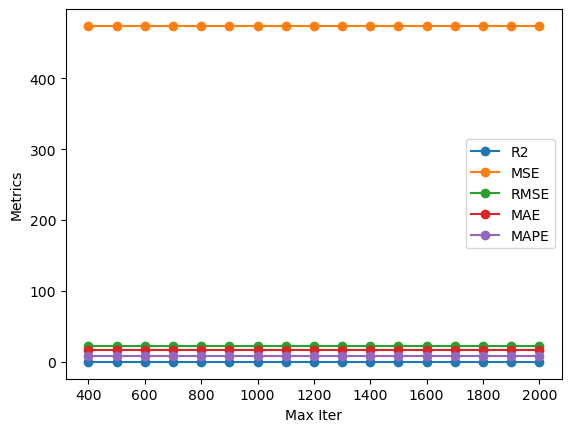

In [9]:
plt.plot(max_iter, r2_list,marker='o', label='R2')
plt.plot(max_iter, mse_list,marker='o', label='MSE')
plt.plot(max_iter,rmse_list,marker='o', label='RMSE')
plt.plot(max_iter,mae_list,marker='o', label='MAE')
plt.plot(max_iter,mape_list,marker='o', label='MAPE')
plt.xlabel('Max Iter')
plt.ylabel('Metrics')
plt.legend()

In [10]:
best_max_iter = max_iter[np.argmin(rmse_list)]
best_max_iter

400

### Aplha

In [12]:
alpha = np.arange(0, 5, 0.2)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [13]:
for i in alpha:
    # Define Model
    lasso = Lasso(random_state=42, max_iter=best_max_iter, alpha=i)

    # Fit Model
    lasso.fit(X_train, y_train)

    # Predict
    y_pred_val = lasso.predict(X_val)

    # Performance Metrics

    r2 = mt.r2_score(y_val, y_pred_val)
    mse = mt.mean_squared_error(y_val, y_pred_val)
    rmse = mt.mean_squared_error(y_val, y_pred_val, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred_val)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred_val)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

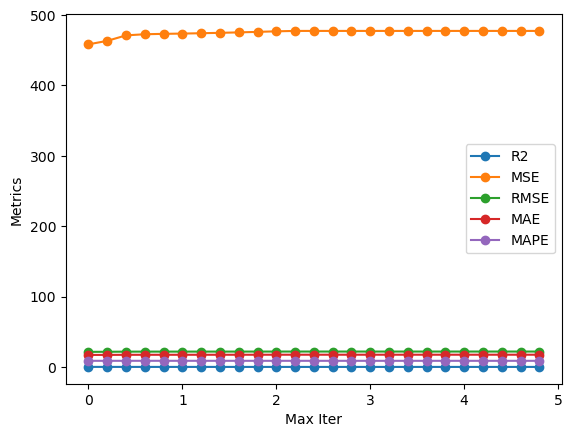

In [14]:
plt.plot(alpha, r2_list,marker='o', label='R2')
plt.plot(alpha, mse_list,marker='o', label='MSE')
plt.plot(alpha,rmse_list,marker='o', label='RMSE')
plt.plot(alpha,mae_list,marker='o', label='MAE')
plt.plot(alpha,mape_list,marker='o', label='MAPE')
plt.xlabel('Max Iter')
plt.ylabel('Metrics')
plt.legend()

In [24]:
best_alpha = alpha[np.argmin(rmse_list)]
best_alpha

0.0

## 2.4 Test Performance

In [25]:
# Define Model
lasso = Lasso(random_state=42, max_iter=best_max_iter, alpha =best_alpha)

# Fit Model
lasso.fit(pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0))

# Predict
y_pred_test = lasso.predict(X_test)

# Performance Metrics

r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = mt.mean_squared_error(y_test, y_pred_test, squared= False)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print('Train R2: {}' .format(r2_test))
print('Train MSE: {}' .format(mse_test))
print('Train RMSE: {}' .format(rmse_test))
print('Train MAE: {}' .format(mae_test))
print('Train MAPE: {}' .format(mape_test))

Train R2: 0.05116551777115064
Train MSE: 461.9884353525593
Train RMSE: 21.4939162404751
Train MAE: 17.144197086987703
Train MAPE: 8.531355027820084


# 3.0 Results

In [26]:
train_metrics = {
    "Algorithm": "Linear Regression - Lasso",
    "R2": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Linear Regression - Lasso",
    "R2": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Linear Regression - Lasso",
    "R2": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False
)